# 회귀분석

## 1. 선형 회귀 분석 (Linear Regression)

- 종속변수 Y와 한 개 이상의 독립변수 X와의 선형 상관관계를 모델링하는 회귀분석 기법 이다.
- 회귀계수와 오차를 데이터로부터 추정하여 모델링을 수행한다.(parameter)
- 독립변수의 개수에 따라 한 개의 독립변수를 가지고 있는 방식은 단순 선형회귀, 둘 이상의 독립변수를 가지고 있는 경우에는 다중 선형회귀라 한다.

### 선형 회귀 분석 실습 (Boston house prices dataset)

In [2]:
from sklearn.datasets import load_boston
from sklearn import model_selection
import pandas as pd
import numpy as np

In [5]:
# 데이터 로드
boston = load_boston()
data, price = boston['data'], boston['target']
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, price, test_size=0.2)

df = pd.DataFrame(x_train, columns=boston['feature_names'])
print("boston dataset의 차원: ", data.shape)
print("price의 차원", price.shape)
print("boston train dataset의 차원: ", x_train.shape)
print("boston test dataset의 차원:", x_test.shape)

print("Boston dataset의 예시")
df.head() # data 요약

boston dataset의 차원:  (506, 13)
price의 차원 (506,)
boston train dataset의 차원:  (404, 13)
boston test dataset의 차원: (102, 13)
Boston dataset의 예시


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.57834,20.0,3.97,0.0,0.575,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44
1,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36
2,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79
3,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74
4,0.08447,0.0,4.05,0.0,0.510,5.859,68.7,2.7019,5.0,296.0,16.6,393.23,9.64


In [6]:
# 데이터 설명
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

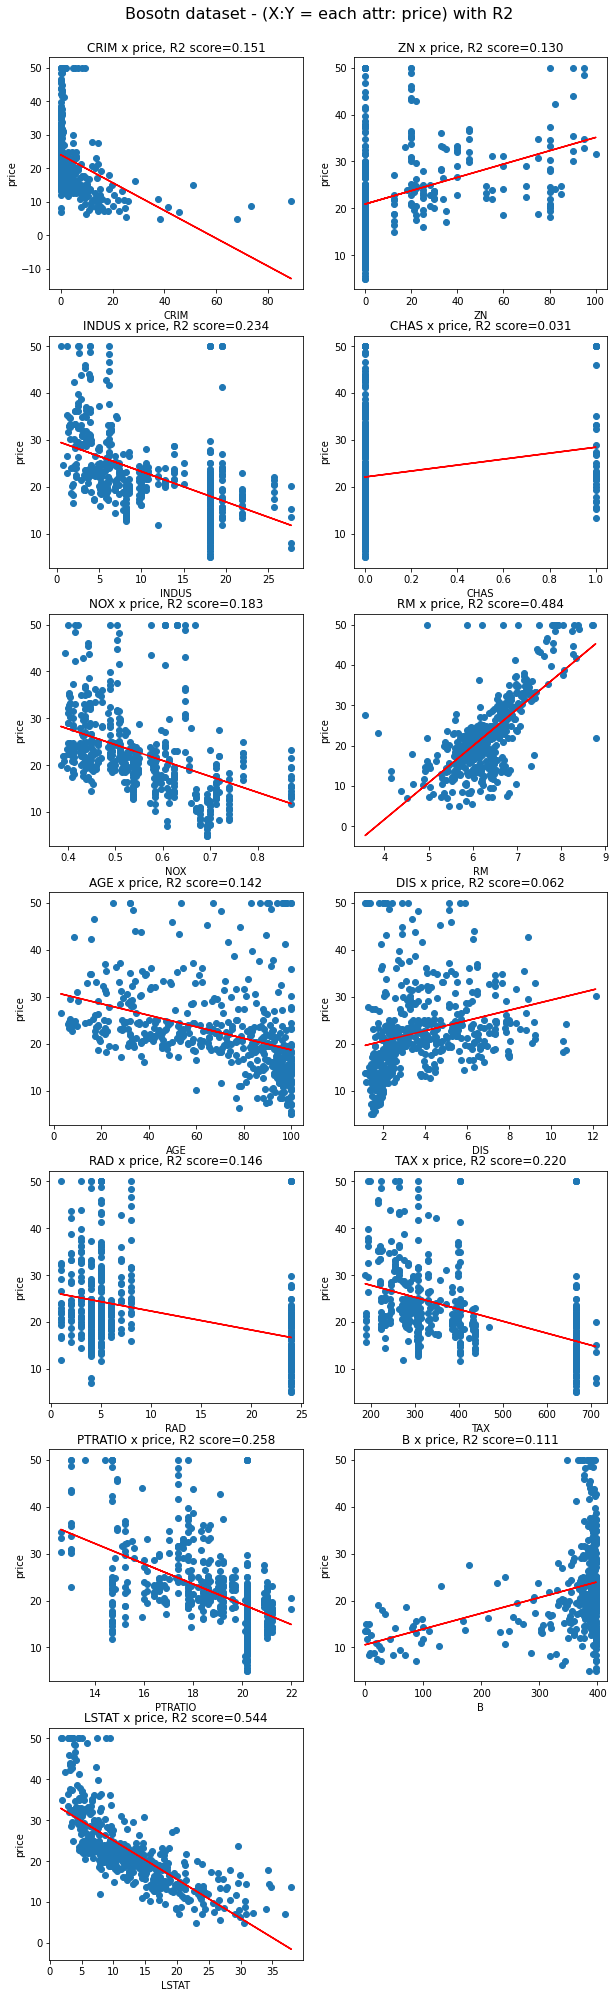

In [14]:
# Boston Dataset의 각 attribute에 Linear Regression 적용해보기
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 35))
fig.suptitle('Bosotn dataset - (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

for i in range(data.shape[1]):
    
    single_attr, attr_name = data[:, i].reshape(-1,1), boston['feature_names'][i] # i번째 컬럼과 그 이름
    estimator = LinearRegression() # 선형 회귀 모델
    
    estimator.fit(single_attr, price) # 모델 학습
    
    pred_price = estimator.predict(single_attr) # fit()과정을 통해 구한 회귀모델에 x값을 대입했을 때 예측되는 Y값
    score = metrics.r2_score(price, pred_price) # 결정계수
    
    # 캔버스 생성
    ax = fig.add_subplot(7, 2, i+1)
    ax.scatter(single_attr, price) # 실제 데이터에 대한 산포도
    ax.plot(single_attr, pred_price, color='red') # 선형 회귀 모델의 추세선
    ax.set_title("{} x price, R2 score={:,.3f}".format(attr_name, score)) # subplot title
    ax.set_xlabel(attr_name) # x축
    ax.set_ylabel('price') # y축 
    
    

## 2. 로지스틱 회귀분석(Logistic Regression)

- 로지스틱 회귀분석이란 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해 주는 지도 학습 알고리즘이다.
- 특정 threshold 값을 기준으로 삼아서 예측된 확률 값이 threshold 이상인 것과 미만인 것으로 분류하는 방식이다.
- 주로, 이진 분류(binary classification) 문제를 풀 때 사용한다.

### 로지스틱 회귀 분석 실습 (Breast Cancer)

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer = load_breast_cancer()

cancer_X, cancer_y = cancer.data, cancer['target']

train_X, test_X, train_y, test_y = train_test_split(cancer_X, 
                                                    cancer_y, 
                                                    test_size = 0.1, 
                                                    random_state=10)

print("전체 검사자 수: {}".format(len(cancer_X)))
print("Attribute 수: {}".format(len(cancer_X[0])))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))

cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
print("Breast Cancer의 예시")
cancer_df.head() # data 요약

전체 검사자 수: 569
Attribute 수: 30
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57
Breast Cancer의 예시


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
# 데이터 설명
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [22]:
# Logistic Regression 적용해보기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression() # 로지스틱 회귀 모델
LR.fit(train_X, train_y) # 모델 학습
pred = LR.predict(test_X) # 학습된 로지스틱 회귀분석을 이용한 결과 예측

# 로지스틱 회귀분석 모델의 예측값과 실제값 비교결과를 나타낸 통계표
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 3. Softmax 함수와 Cross Entropy

### Softmax 함수
- Multi class classification에 적합한 함수
- 모든 번주에 해당하는 softmax의 값을 전부 더하면 1
- 큰 log-odds와 작은 log-odds의 차이를 극대화(큰 값을 1로, 작은 값을 0으로 one-hot encoding)

### Cross Entropy

- softmax 함수의 손실함수
- 로지스틱 회귀모델이 추론한 확률분포와 실제 데이터 분포의 차이를 계산
- 이 차이가 적을수록 Cross entropy가 작아진다

### Softmax 및 cross entropy 예제(Breast Cancer)¶

In [24]:
# Tensorflow version1

import tensorflow.compat.v1 as tf
import numpy as np
tf.compat.v1.disable_eager_execution()

x = tf.placeholder(tf.float32, [None, 30])
y = tf.placeholder(tf.float32, [None, 2])
num_classes = 2 # 악성, 양성
lr = 0.0003 # learning rate

W = tf.Variable(tf.random_normal([30, num_classes]), name='weight') # 가중치
b = tf.Variable(tf.random_normal([num_classes]), name='bias') # bias

logits = tf.matmul(x, W) + b
hypothesis = tf.nn.softmax(logits) # log-odds에 softmax 적용한 값

loss_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y) # i번째 변수의 p(x)*log(q(x))
loss = tf.reduce_mean(loss_i) # 이를 모두 summation한 최종 loss function

#최적화함수로 gradient descent method 사용
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

pred = tf.argmax(hypothesis, 1) # hypothesis의 결과 큰 값을 1, 작은 값을 0으로 매핑
correct_pred = tf.equal(pred, tf.argmax(y, 1)) # 예측값과 ground truth 값을 비교해서 같으면 True, 다르면 False
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32)) # True는 1, False는 0이 되기 때문에 전체 평균값이 결국 accuracy가 됩니다.


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # Tensorflow의 전역 변수 초기화
    one_hot_train_y = np.eye(num_classes)[train_y] # one-hot encoding을 수행한 train data 라벨
    one_hot_test_y = np.eye(num_classes)[test_y] # one-hot encoding을 수행한 test data 라벨
    
    # 전체 train data를 1000번 iteration
    for step in range(1000):
        sess.run(optimizer, feed_dict={x: train_X, y: one_hot_train_y}) # train data로 학습
        test_loss, test_acc= sess.run([loss, accuracy], feed_dict={x: test_X, y: one_hot_test_y}) #학습된 모델을 통해 측정한 test data의 loss 값 및 정확도
        if step % 10 == 0: # 10번째 step마다 print 수행
            print("Step {}, loss: {:.3f} accuracy: {:.3f}".format(
            step, 
            test_loss,
            test_acc
            ))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 0, loss: 586.727 accuracy: 0.368
Step 10, loss: 141.622 accuracy: 0.368
Step 20, loss: 12.535 accuracy: 0.526
Step 30, loss: 88.118 accuracy: 0.368
Step 40, loss: 88.556 accuracy: 0.368
Step 50, loss: 106.529 accuracy: 0.368
Step 60, loss: 69.400 accuracy: 0.368
Step 70, loss: 92.362 accuracy: 0.368
Step 80, loss: 66.967 accuracy: 0.368
Step 90, loss: 72.692 accuracy: 0.368
Step 100, loss: 62.841 accuracy: 0.368
Step 110, loss: 57.256 accuracy: 0.368
Step 120, loss: 51.364 accuracy: 0.368
Step 130, loss: 45.899 accuracy: 0.368
Step 140, loss: 39.996 accuracy: 0.368
Step 150, loss: 32.124 accuracy: 0.386
Step 160, loss: 25.578 accuracy: 0.474
Step 170, loss: 13.800 accuracy: 0.614
Step 180, loss: 9.525 accuracy: 0.667
Step 190, loss: 9.122 accuracy: 0.684
Step 200, loss: 8.545 accuracy: 0.702
S